# <center> **Resampling Plans for Bootstrap** </center>

### <center> Ludovic Figarella, Arnaud Venencie </center> 

#Enoncé
The student shall run some test in order to investigate different resampling schemes than the one used in Efron’s original bootstrap (see for instance Proposition 2.16 of the lecture notes). He will first present the different resampling plans and if possible explain why they are working. He will compare them through well chosen examples.

#Introduction 

Nous avons vu en cours le schéma de bootstrap proposé par Bradley Efron. Par la suite, de nombreux autres schémas ont été proposés. Nous tacherons dans ce projet, de présenter différents schémas de rééchantillonnage.

Dans un premier temps, nous présenterons rapidement le bootstrap proposé par Efron, et nous l'appliquerons sur un exemple.

Puis nous présenterons le bootstrap paramétrique en le comparant au bootstrap Efron à travers un exemple.

Nous tâcherons d'expliquer le fonctionnement du Fractional Random Weight Resampling, une forme de rééchantillonage avec des poids. Nous l'analyserons de manière plus théorique et nous le comparerons à travers un exemple au bootstrap d'Efron.

Nous expliquerons ensuite le fonctionnement du smoothed bootstrap, et présenterons brièvement d'autres schémas de bootstrap. 

# Import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.special as sps  
import random
import math as mt

# I. Le bootstrap d'Efron

Le principe du bootstrap est d'approcher par simulation la distribution d'un estimateur. On note la distribution $F$, inconnue, de l'échantillon. Cette derniere est subsitué par la distribution emprique notée $\hat{F}$. On va ensuite générer de nouveaux échantillons suivant cette loi $\hat{F}$. Ainsi pour générer ces nouveaux échantillons, on va réaliser $n$ tirages aléatoires avec remise de notre échantillon de départ.

L'algorithme est le suivant : 

$X$ notre échantillon, de parametre $\theta$


*   Pour b allant de 1 à B:

> *   On génère un échantillon bootstrap $X_{b}^{*}$
> *   On calcule la statistique $\theta_{b}^{*}$ sur le nouvel échantillon

L'estimateur bootstrap de $\theta$ est $\hat{\theta}^{*}=\frac{1}{B} \sum_{b=1}^{B} \hat{\theta}^{*}_{b}.$

## Application 

Appliquons de maniere très simple notre algorithme bootstrap à une population. 

On possede une dizaine d'obervations de moyenne 2.87 et de médiane 2.8.  
Ici on se concentrera sur la création d'une fonction générique pour le bootstrap d'Efron.

In [ ]:
pop = np.array([2.3, 3.4, 2.5, 3.2, 2.7, 2.6, 3.1, 3.5,2.9,2.5])

In [ ]:
pop_mean = pop.mean()
pop_med = np.median(pop)
print('Moyenne de notre population :', pop_mean)
print('Mediane de notre population :',pop_med)

Moyenne de notre population : 2.8699999999999997
Mediane de notre population : 2.8


In [ ]:
def bootstrap(data, n=100, func=np.mean):
    """
    Génération de n échantillons bootstrap, en évaluant
    'func' à chaque fois.
    Retourne n estimations.
    """
    simulations = list()
    sample_size = len(data)
    xbar_init = np.mean(data)
    for c in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
    simulations.sort()
    return(simulations)


## Résultat

In [ ]:
bootstrap_mean = np.mean(bootstrap(pop))
bootstrap_med = np.mean(bootstrap(pop,func= np.median))
print('Bootstrap moyenne :',bootstrap_mean)
print('Bootstap mediane :',bootstrap_med )

Bootstrap moyenne : 2.881099999999999
Bootstap mediane : 2.8104999999999993


On remarque que notre estimation via le bootstrap d'Efron approche très bien les valeurs réelles.

On peut aussi pour chaque estimateur tracer la distribution empirique.

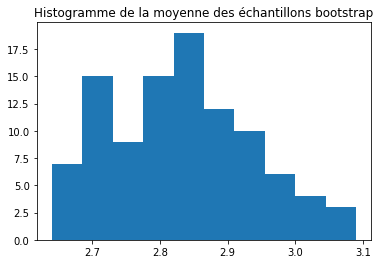

In [ ]:
plt.hist(bootstrap(pop))
plt.title("Histogramme de la moyenne des échantillons bootstrap")
plt.show()

#II. Bootstrap paramétrique

Le bootstrap paramétrique est une méthode utile pour l'estimation du biais et de la variance
quand on sait que l'échantillon provient d'une population ayant une distribtion $F$,
qui est un membre d'une famille paramétrique de distribution de 
paramètre inconnu, ou ensemble de paramètres, µ : $F \in\left\{F_{\phi}: \phi \in \Phi\right\}$


Par exemple:



*   $F$ distibution normale, $F \in\left\{F_{\left(\mu, \sigma^{2}\right)}: \mu \in R, \sigma^{2} \in R_{+}\right\}$ où $F_{\left(\mu, \sigma^{2}\right)}$ est une distribution d'une variable aléatoire normale.






Dans une telle situation, la distribution empirique $\hat{F}$ est un membre de la famille de paramètre $\hat{\phi}$, avec $\hat{\phi}$ une estimation de $\phi$.

Par conséquent, pour calculer le biais et la variance de certains
paramètres $\theta$, nous simulons des échantillons bootstrap à partir de la distribution empirique, 
$\hat{F}  ≡ F_{\hat{\phi}}$ et nous calculons les estimations bootstrap de $\hat{\phi}$.

$\theta$ peut être le même que $\phi$, mais il peut aussi être une fonction de $\phi$. Ainsi on peut représenter la procédure du bootstrap paramétrique de la manière suivante:

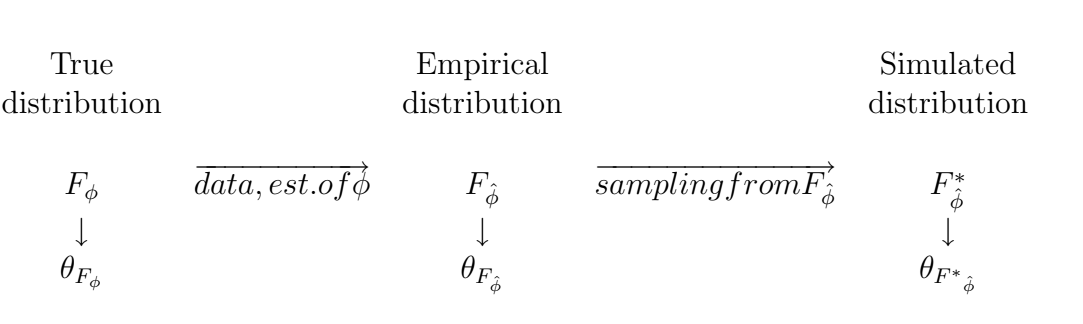

## Changer le schema

## Application 


On a une population $X = \{ X_{1},...., X_{n} \}$ avec $X_{i} \sim \operatorname{Exp}(\lambda)$, pour tout $i$ allant de $1$ à $n$, et $\lambda$ est inconnu. La distribution empirique  $F$ et la fonction de densité f :

$F(x)=\left\{\begin{array}{ll}0 & \text { if } x \leq 0 \\ 1-e^{-\lambda x} & \text { if } x>0\end{array}\right.$


$f(x)=\left\{\begin{array}{ll}0 & \text { if } x \leq 0 \\ \lambda e^{-\lambda x} & \text { if } x>0\end{array}\right.$

On sait que pour une loi exponentielle, $E\left(X_{i}\right)=\frac{1}{\lambda}$, et donc que $\bar{X}$ est un estimateur sans biais de $\frac{1}{\lambda}$. 

Ainsi, $\hat{\lambda}=\frac{1}{\bar{X}}$ peut être utilisé pour obtenir la distribution empirique, c'est à dire: $F_{\hat{\lambda}}=\hat{F}_{\frac{1}{\bar{X}}}$. On va générer des échantillons depuis $\operatorname{Exp}\left(\frac{1}{\bar{X}}\right)$.

### Population
Appliquons à un exemple industriel notre bootstrap paramétrique. Un ingénieur sait qu'un composant électronique a une durée de vie utile représentée par une
densité exponentielle avec le taux λ de défaillances par heure. Le temps moyen avant défaillance
est donc $E\left(X\right)=\frac{1}{\lambda}$
. Une série de 100 observations  suivant la loi $\operatorname{Exp}(\lambda= \frac{1}{50})$ a donné une estimation de la moyenne
$\bar{X}$ = 49.99 heures. Il y avait 40 composants qui avaient une durée de vie plus courte qu'un
jour. Un ingénieur s'intéresse à la fraction des composants qui
échoue en moins de 24 heures.

Nombre de composants qui durent moins d'une journée : 38
Moyenne de durée de vie : 49.99301446047064


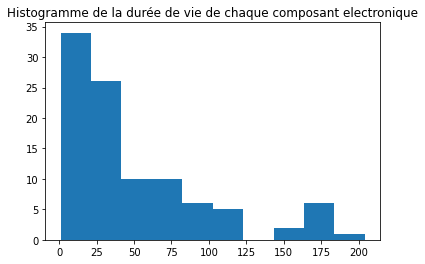

In [ ]:
np.random.seed(33)
pop_electronique = np.random.exponential(scale=50, size=100)

pop_mean = np.mean(pop_electronique)
print("Nombre de composants qui durent moins d'une journée :", (pop_electronique<24).sum())
print("Moyenne de durée de vie :", pop_mean)

plt.title("Histogramme de la durée de vie de chaque composant electronique")
plt.hist(pop_electronique)
plt.show()

Ainsi on essaye d'estimer la fraction des composants qui dure moins de 24h.

Ici:   $\hat{\theta}= 38 $

### Avec le bootstrap paramétrique

On va ainsi créer 500 échantillons bootstrap. Ces échantillons sont créés à partir de Loi exponentielle de paramètre $\hat{\lambda} = \frac{1}{50}$.

L'algorithme est le suivant :

$X$ notre échantillon, de paramètre $\theta$

*   Pour $b$  allant  de  $1$ à $B =500$:

> *   On génère un échantillon bootstrap $X_{b}^{*}  \sim \operatorname{Exp}(\hat{\lambda})$
> *   On calcule la statistique $\theta_{b}^{*}$ sur le nouvel échantillon, donc le nombre d'observations inférieur à 24

L'estimateur bootstrap de $\theta$ est $\hat{\theta}^{*}=\frac{1}{B} \sum_{b=1}^{B} \hat{\theta}^{*}_{b}.$


In [ ]:
theta_hat = (pop_electronique<24).sum()/100 # On s'interesse au nombre de composants échoués en 24h 
theta_star = []
for i in range(500):
  intersample = np.random.exponential(scale=pop_mean, size=100) # On genere un sample a partir des observations 
  theta_star_i = 1-np.exp((-1/np.mean(intersample))*24)  # EN utilisant la formule de cdf 
  theta_star.append(theta_star_i)

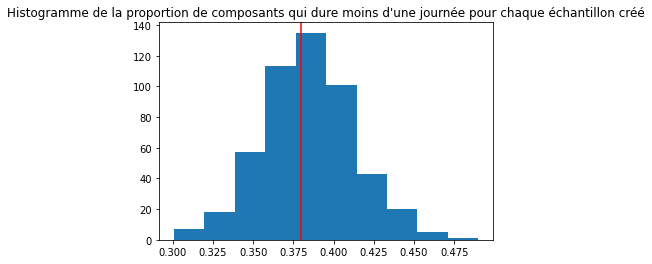

In [ ]:
plt.title("Histogramme de la proportion de composants qui dure moins d'une journée pour chaque échantillon créé")
plt.hist(theta_star)
plt.axvline(x=theta_hat, color = 'red')
plt.show()

In [ ]:
print('Bootstrap mean :', np.mean(theta_star))
print('Bootstrap biais :', np.mean(theta_star) - theta_hat )
print('Bootstrap var :', np.var(theta_star))
print('Bootstrap ecart type :', np.sqrt(np.var(theta_star)))

Bootstrap mean : 0.3844265964373129
Bootstrap biais : 0.004426596437312913
Bootstrap var : 0.000841665442973456
Bootstrap ecart type : 0.029011470886072907


### Avec le Bootstrap Efron

L'algorithme est le suivant : 

$X$ notre échantillon, de paramètre $\theta$

*   Pour $b$  allant  de  $1$ à $B =500$:

> *   On génere un échantillon bootstrap $X_{b}^{*}$ par tirage aléatoire avec remise
> *   On calcule la statistique $\theta_{b}^{*}$ sur le nouvel échantillon, donc le nombre d'observations inférieur à 24

In [ ]:
theta_star_efron = list()
for i in range(500):  # generate a bootstrap sample a each time n
  itersample = np.random.choice(pop_electronique, size=100, replace=True)
  theta_star_efron_i = (itersample<24).sum()/100
  theta_star_efron.append(theta_star_efron_i)

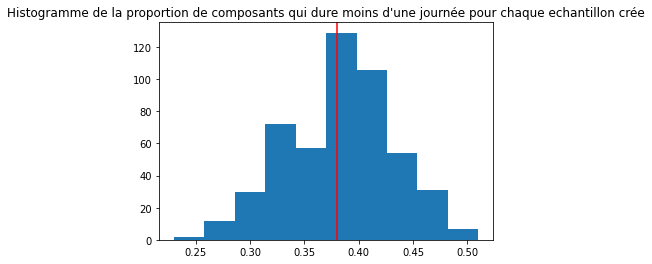

In [ ]:
plt.title("Histogramme de la proportion de composants qui dure moins d'une journée pour chaque echantillon crée")
plt.hist(theta_star_efron)
plt.axvline(x=theta_hat, color = 'red')
plt.show()

In [ ]:
print('Bootstrap mean :', np.mean(theta_star_efron))
print('Bootstrap biais :', np.mean(theta_star_efron) -theta_hat )
print('Bootstrap var :', np.var(theta_star_efron))
print('Bootstrap ecart type :', np.sqrt(np.var(theta_star_efron)))

Bootstrap mean : 0.38221999999999995
Bootstrap biais : 0.0022199999999999442
Bootstrap var : 0.0023764715999999996
Bootstrap ecart type : 0.04874906768339267


## Résultat

On remarque que la valeur des etimateurs bootstrap est sensiblement la même pour le bootstrap paramétrique et le bootstrap Efron. De plus on peut noter qu'on obtient un plus petit écart type des valeurs de la moyenne de nos échantillons bootstrap pour le bootstrap paramétrique.

#### Intervalle de confiance

In [ ]:
def ci(p,simulations):   # return confindence interval 
    """
    Return 2-sided symmetric confidence interval specified
    by p.
    """
    n = len(simulations)
    simulations = sorted(simulations)
    u_pval = (1+p)/2.
    l_pval = (1-u_pval)
    l_indx = int(np.floor(n*l_pval))
    u_indx = int(np.floor(n*u_pval))
    return(round(simulations[l_indx], 3), round(simulations[u_indx], 3))

cintervals_bootstrap_efron = [ci(p,theta_star_efron) for p in (.90, .95, .99, .995)]
cintervals_bootstrap_param =[ci(p,theta_star) for p in (.90, .95, .99, .995)]
print("Intervalle de confiance de bootstrap Efron :", cintervals_bootstrap_efron)
print("Intervalle de confiance de bootstrap paramétrique :", cintervals_bootstrap_param)

Intervalle de confiance de bootstrap Efron : [(0.3, 0.46), (0.28, 0.47), (0.26, 0.51), (0.24, 0.51)]
Intervalle de confiance de bootstrap paramétrique : [(0.34, 0.435), (0.326, 0.447), (0.314, 0.461), (0.313, 0.465)]


On remarque ici que l'on obtient de meilleurs intervalles de confiance pour le bootstrap paramétrique. En effet pour un intervalle à 95%  par exemple, on obtient $[0.326, 0.447]$ pour le bootstrap paramétrique contre $[0.28, 0.47]$ pour le bootstrap Efron.

Ainsi pour cet exemple, l'application d'un schema de bootstrap paramétrique semble meilleure que la version classique du Bootstrap Efron.

#III. Fractional Random Weight Resampling

## Présentation

L'idée d'un rééchantillonnage avec des poids est apparue rapidement après la méthode proposée par Efron. Elle permet de faire face à un déséquilibre dans un jeu de données d'apprentissage. La méthode est simple, il suffit d'associer un poids $w_i \in \mathbb{N}$ à chaque observation $X_i$, de manière à ce que la somme des poids soit égale au nombre de données $n$. 

Sous l'idée de rééchantillonage avec des poids, le bootstrap d'Efron peut se réécrire de manière équivalente comme suit: on tire des poids suivant une distribution multinomiale de probabilité uniforme $\frac{1}{n}$ pour chacune des observations $X_i$. Le vecteur de poids $(w_1,...,w_n)$ suit alors une distribution multinomiale uniforme. $(w_1,...,w_n)$ a alors pour espérance 1 et variance $\frac{n-1}{n}$.

\

L'idée derrière le Fractional Weight Resampling est de réaliser un bootstrap en utilisant des poids continus. On génère un vecteur de poids $(w_1, ..., w_n)$ suivant une loi de Dirichlet uniforme, multplié par $n$.

La loi de Dirichlet a pour fonction de densité de probabilité: $f(w_1,...w_n; \alpha_1,...\alpha_n) = \frac{1}{B(\alpha_1,...\alpha_n)}*\prod_{i=1}^n w_i^{\alpha_i - 1}$, avec $\sum_{i=1}^n w_i = 1$ et $w_i \geq 0$, où $B(\alpha_1,...\alpha_n)$ est le facteur qui normalise, défini par $B(\alpha)=\frac{\prod_{i=1}^{K} \Gamma\left(\alpha_{i}\right)}{\Gamma\left(\sum_{i=1}^{K} \alpha_{i}\right)}$

Le cas uniforme est celui où on a $\alpha_i = 1, \forall i \in [1,n]$, soit  $B(\alpha)=1$. On a dans ce cas là une espérance égale à 1, et une variance valant $\frac{n-1}{n+1}$.


In [ ]:
# Génération de vecteurs de poids qui vont être utilisés pour le bootstrap

n = 1000
B = 1000

weights = n*np.random.dirichlet([1]*n, B)

In [ ]:
mult_dist = np.random.multinomial(1000, [1/n]*n, size=2)

print('Espérance premier ech :', np.mean(mult_dist[0]))
print('Espérance deuxieme ech :', np.mean(mult_dist[1]))
print('Variance premier ech :', np.var(mult_dist[0]))
print('Variance deuxième ech :', np.var(mult_dist[1]))

Espérance premier ech : 1.0
Espérance deuxieme ech : 1.0
Variance premier ech : 1.004
Variance deuxième ech : 1.014


## Application

Comparons les méthodes pour une loi $\Gamma(k, \theta)$.

Pour une telle loi, on sait que l'on a, pour un échantillon $X_i$ tiré selon cette loi, $\mathbb{E}(X_i) = k*\theta$, et $\mathbb{Var}(X_i) = k*\theta^2$.

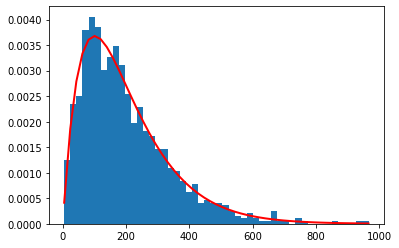

In [ ]:
# Loi gamma avec peu d'observations (1000)

k = 2 #shape
theta = 100 # scale
dist = np.random.gamma(k, theta, 1000)

count, bins, ignored = plt.hist(dist, 50, density=True)
y = bins**(k-1)*(np.exp(-bins/theta) /  
                     (sps.gamma(k)*theta**k))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

Avec $k=2$ et $\theta = 10$, cela donne $\mathbb{E}(X) = 20$, et $\mathbb{Var}(X) = 200$.

In [ ]:
# Réalisons le bootstrap

frw = []
means = []
vars = []
for i in range(B):
  frw.append([weight*atom for (weight,atom) in zip(weights[i], dist)])
  means.append(np.mean(frw[i]))

In [ ]:
print("Espérance de l'échantillon de base :", round(np.mean(dist), 4))

print("Espérance moyennne des échantillons bootstrap Efron :", round(np.mean(bootstrap(dist)), 4))

print("Espérance moyenne des échantillons bootstrap FRW :", round(np.mean(means), 4))

Espérance de l'échantillon de base : 199.8425
Espérance moyennne des échantillons bootstrap Efron : 200.2678
Espérance moyenne des échantillons bootstrap FRW : 199.5284


In [ ]:
mean_efron = bootstrap(dist)

cintervals_mean_frw = [ci(p, means) for p in (.90, .95, .99, .995)]
cintervals_mean_efron = [ci(p,mean_efron) for p in (.90, .95, .99, .995)]

In [ ]:
print("Intervalles de confiance pour l'espérance FRW :", cintervals_mean_frw)
print("Intervalles de confiance pour l'espérance Efron :", cintervals_mean_efron)

Intervalles de confiance pour l'espérance FRW : [(192.42, 206.983), (190.972, 208.367), (187.59, 208.876), (187.411, 209.539)]
Intervalles de confiance pour l'espérance Efron : [(193.567, 207.105), (192.604, 208.104), (188.341, 211.449), (188.341, 211.449)]


Selon les vecteur de poids générés, on peut avoir des résultats différents. Le principal intérêt de cette méthode, est qu'on est sûrs d'avoir chaque donnée de l'échantillon de départ, contrairement à lorsqu'on procède à un bootstrap avec la méthode d'Efron. 

La distribution est ici asymétrique, avec un très faible nombre d'observations vers la droite. Il se peut que le rééchantillonage selon Efron omette la plupart du temps ces valeurs, et alors il aura une estimation plus faible des paramètres que le bootstrap FRW.

C'est donc particulièrement utile lorsque l'estimation d'un paramètre se fait mal quand certaines observations ne sont pas prises en compte dans des échantillons. Le bootstrap FRW est une méthode encore plus généralement applicable que le bootstrap d'Efron, qui performe d'un manière sensiblement équivalente sur des problèmes généraux, et qui est notamment applicable sur des problèmes pour lesquels il y a beaucoup de censure ou des expériences spécifiques dotées de très peu d'observations et/ou de nombreux paramètres.


## Validité du bootstrap FRW

Soit un vecteur $(w_1,...w_n)$ tiré selon une loi de Dirichlet uniforme où chaque composant a été multiplié par $n$.

Soient $(X_1,...X_n)$ nos $n$ observations tirées de la distribution originelle dont on cherche à estimer les paramètres.

L'estimateur du maximum de vraisemblance pour le paramètre $\theta$ s'écrit $l(\theta) = \frac{1}{n}\sum_{i=1}^nl_i(\theta;X_i)$, et sous forme pondérée : $l^*(\theta) = \frac{1}{n}\sum_{i=1}^nw_i*l_i(\theta; X_i)$. On cherche à montrer que l'estimateur $\hat{\theta}^*$, solution de $\frac{\partial l^*(\theta)}{\partial\theta} = 0$ est un bon estimateur de $\theta$.

\\
#### <u> Montrons que l'estimateur $\hat{\theta}^*$ est consistant pour $\theta$ </u> :

Par indépendance des $X_i$, donc des $l_i(\theta;X_i)$, notons $h(\theta) = \mathbb{E}(l_i(\theta; X_i)), \forall i$.  

On a directement par indépendance $\mathbb{E}(l(\theta)) = h(\theta)$, et comme $\hat{\theta}$ est consistant, 
$\lim\limits_{n \rightarrow + \infty} \mathbb{Var}(l(\theta)) = 0$.

Pour $l^*(\theta)$, on a :
$$
\begin{aligned}
\mathbb{E}(l^*(\theta)) &= \frac{1}{n}\sum_{i=1}^n\mathbb{E}(w_i*l_i(\theta;X_i)) \\
&= \frac{1}{n}\sum_{i=1}^n\mathbb{E}(w_i)*\mathbb{E}(l_i(\theta;X_i))
\end{aligned}
$$
Par indépendance entre les $w_i$ et les $l_i(\theta;X_i)$.

Or, étant donné la distribution du vecteur $(w_1,...,w_n)$, on sait que $\mathbb{E}(w_i) = \mathbb{E}(w_1) = 1$. On a alors:

$$
\begin{aligned}
\mathbb{E}(l^*(\theta)) &= \frac{1}{n}\sum_{i=1}^nh(\theta) \\
&= h(\theta)
\end{aligned}
$$

Et la variance, par le théorème de la variance totale, peut s'écrire:
$$
\begin{aligned}
\mathbb{Var}(l^*(\theta)) &= \mathbb{Var}(\mathbb{E}(l^*(\theta)|X_1,...X_n)) + \mathbb{E}(\mathbb{Var}(l^*(\theta)|X_1,...X_n))\\
\end{aligned} 
$$

Le premier terme se calcule facilement:

$$
\begin{aligned}
\mathbb{Var}(\mathbb{E}(l^*(\theta)|X_1,...X_n)) &= \mathbb{Var}(\frac{1}{n}\sum_{i=1}^n\mathbb{E}(w_i*l_i(\theta;X_i)|X_i)) \\
&= \mathbb{Var}(\frac{1}{n}\sum_{i=1}^nl_i(\theta;X_i)*\mathbb{E}(w_i|X_i))
\\
\text{car  } l_i(\theta;X_i) \text{  est  } X_i \text{-mesurable  } \forall i
\\
&= \mathbb{Var}(\frac{1}{n}\sum_{i=1}^nl_i(\theta;X_i)) \\
&= \mathbb{Var}(l(\theta))
\end{aligned}
$$

Connaissant l'expression de la variance conditionnelle on a :
$$
\begin{aligned}
\mathbb{Var}(l^*(\theta)|X_1,...X_n) &= \mathbb{E}([l^*(\theta)-\mathbb{E}(l^*(\theta)|X_i)]^2|X_i) \\
&= \mathbb{E}([l^*(\theta) - l(\theta)]^2|X_i)  \text{  par l'équation ci dessus} \\
&= \mathbb{E}(l^*(\theta)^2|X_i) - 2\mathbb{E}(l^*(\theta)*l(\theta)|X_i) + \mathbb{E}(l(\theta)^2|X_i) \\
&= \mathbb{E}(l^*(\theta)^2|X_i) - l(\theta)^2 \text{ , car } l(\theta)^2 \text{  est  } X_i\text{-mesurable, et par ce qui a été fait avant}.
\end{aligned}
$$

Puis, on a 
$$
\begin{aligned}
\mathbb{E}(l^*(\theta)^2|X_i) &= \mathbb{E}(\frac{1}{n^2}(\sum_{i=1}^nw_i*l_i(\theta;X_i))^2|X_i) \\
&= \mathbb{E}(\frac{1}{n^2}(\sum_{i=1}^nw_i^2*l_i(\theta;X_i)^2 + \sum_{i \neq j}w_i*w_j*l_i(\theta;X_i)*l_j(\theta;X_j))|X_i, X_j) \\

  \text{  par indépendance et  } X_i\text{-mesurabilité}
\\
&= \frac{1}{n^2}(\sum_{i=1}^nl_i(\theta;X_i)^2*\mathbb{E}(w_i^2|X_i) + \sum_{i \neq j}l_i(\theta;X_i)*l_j(\theta;X_j)*\mathbb{E}(w_i|X_i)*\mathbb{E}(w_j|X_j))
\end{aligned}
$$

Or, par construction de notre vecteur $(w_1,...w_n)$, on a $\mathbb{Var}(w_i) = \frac{n-1}{n+1} = \mathbb{E}(w_i^2) - \mathbb{E}(w_i)^2$. Soit $\mathbb{E}(w_i^2) = \frac{2n}{n+1}$. D'où 

$$
\begin{aligned}
\mathbb{E}(l^*(\theta)^2|X_i) &= \frac{2}{n(n+1)}\sum_{i=1}^nl_i(\theta;X_i)^2 + \frac{1}{n^2}\sum_{i \neq j }l_i(\theta;X_i)*l_j(\theta;X_j)
\end{aligned}
$$

Notre deuxième terme s'écrit alors (par linéarité de l'espérance et indépendance des $l_i(\theta;X_i)$):
$$
\begin{aligned}
\mathbb{E}(\mathbb{Var}(l^*(\theta)|X_1,...X_n)) &= \frac{2}{n(n+1)}\sum_{i=1}^n\mathbb{E}(l_i(\theta;X_i)^2) + \frac{1}{n^2}\sum_{i \neq j }h(\theta)^2 - \mathbb{E}(l(\theta)^2) \\
&= \frac{2}{n+1}(\mathbb{Var}(l_1(\theta;X_1)) + \mathbb{E}(l_1(\theta;X_1))^2) + \frac{n-1}{n}h(\theta)^2 - (\mathbb{Var}(l(\theta)) + h(\theta)^2) \\
&= \frac{2}{n+1}\mathbb{Var}(l_1(\theta;X_1)) - \mathbb{Var}(l(\theta)) + (\frac{2}{n+1} + \frac{n-1}{n} - 1)h(\theta)^2 \\
&= \frac{2}{n+1}\mathbb{Var}(l_1(\theta;X_1)) - \mathbb{Var}(l(\theta)) + \frac{n-1}{n(n+1)}h(\theta)^2
\end{aligned}
$$

Enfin, 
$$
\begin{aligned}
\mathbb{Var}(l^*(\theta)) &= \frac{2}{n+1}\mathbb{Var}(l_1(\theta;X_1)) + \frac{n-1}{n(n+1)}h(\theta)^2 \\
\text{ Donc:  }
\lim\limits_{n \rightarrow \infty} \mathbb{Var}(l^*(\theta)) = 0
\end{aligned}
$$

On a donc $l^*(\theta)$ qui converge vers $h(\theta)$ par la loi des grands nombres, et $l(\theta)$ et $l^*(\theta)$ convergent vers la même fonction $h(\theta)$. De manière équivalente, les solutions des équations $\frac{\partial l(\theta)}{\partial\theta} = 0 $ et $\frac{\partial l^*(\theta)}{\partial\theta} = 0$ convergent vers $\theta$. Ceci prouve la consistance de notre estimateur FRW $\hat{\theta}^*$ !


#IV. Balanced

Le balanced bootstrap a pour but de rééchantilloner chaque observation le même nombre de fois pour nos $B$ rééchantillonages. On rééchantillonne alors en suivant une permutation de $B*n$ éléments.

Tâchons de l'illustrer sur un exemple:

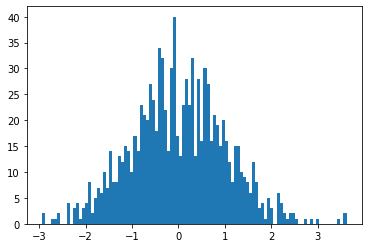

In [ ]:
orig_sample_data = np.random.normal(size=1000)
plt.hist(orig_sample_data, bins=100)
plt.show()

In [ ]:
def resample_balanced(data, B):
  '''Fonction rééchantillonnant B fois à l'aide d'une
  permutation créée de len(data)*B valeurs
  Renvoie une liste de B listes composées de len(data) éléments
  '''
  n = len(data)
  
  # Creating the permutation vector randomly
  atoms = np.array([[j for j in range(n)] for i in range(B)]).flatten()
  random.shuffle(atoms) # randomize the order
  permutation = np.reshape(atoms, (B, n)) # reshape into 2D array of n*n

  sample_array = []
  for k in range (B):
    sample_array.append([data[permutation[k,i]] for i in range(n)])
  
  return sample_array

In [ ]:
balanced_samples = resample_balanced(orig_sample_data, 2000) # On créé les échantillons

In [ ]:
# Valeurs de notre échantillon originel

print('Original sample mean :', np.mean(orig_sample_data) )
print('Original sample variance :', np.var(orig_sample_data))

Original sample mean : 0.002767330766544255
Original sample variance : 1.0343171545108711


In [ ]:
balanced_mean = []
balanced_var = []

for i in range (len(balanced_samples)):
  balanced_mean.append(np.mean(balanced_samples[i]))
  balanced_var.append(np.var(balanced_samples[i]))

print('Balanced mean :', np.mean(balanced_mean))
print('Balanced variance :', np.mean(balanced_var))

Balanced mean : 0.0027673307665442622
Balanced variance : 1.0333419653384188


In [ ]:
# Comparons au bootstrap Efron

bootstrap_mean = np.mean(bootstrap(orig_sample_data))
bootstrap_var = np.mean(bootstrap(orig_sample_data,func= np.var))
print('Bootstrap mean :', bootstrap_mean)
print('Bootstrap variance :', bootstrap_var)

Bootstrap mean : 0.00471507149055012
Bootstrap variance : 1.0278321125987397


Regardons enfin les intervalles de confiance

In [ ]:
efron_var = bootstrap(orig_sample_data, func=np.var)

cintervals_var_balanced = [ci(p, balanced_var) for p in (.90, .95, .99, .995)]
cintervals_var_efron = [ci(p,efron_var) for p in (.90, .95, .99, .995)]

print("Intervalles de confiance pour la Variance Balanced :", cintervals_var_balanced)
print("Intervalles de confiance pour l'espérance Efron :", cintervals_var_efron)

Intervalles de confiance pour la Variance Balanced : [(0.959, 1.114), (0.944, 1.129), (0.924, 1.171), (0.909, 1.184)]
Intervalles de confiance pour l'espérance Efron : [(0.957, 1.118), (0.941, 1.133), (0.907, 1.142), (0.907, 1.142)]


On ne voit pas de réélle différence encore une fois, entre le bootstrap classique et la méthode employée, cependant on peut en dire 2 choses. D'une part, lorsqu'on emploie cette méthode, la moyenne bootstrap calculée sera toujours égale à celle de notre échantillon originel, toutes les observations étant prises le même nombre de fois. D'autre part, cette méthode réduit la variabilité de l'estimée de la variance.

Enfin, de part sa construction, le rééchantillonage n'est plus fait de manière indépendante et identiquement distribuée, ce qui fait perdre les propriétés vues en cours...


#V. Le 'smooth' bootstrap

Nous avons vu comment le bootstrap paramétrique et le bootstrap non paramétrique diffèrent selon ce qui est branché dans la fonction statistique.
Nous voulons estimer $\lambda_n(F)$ et nous pouvons utiliser comme estimation soit $\lambda_n(F_{\hat{\theta}})$ soit $\lambda_n(\hat{F}_n)$. En fait, il y a un choix intermédiaire, qui prend le cdf empirique $\hat{F}_n$ et le lisse un peu, puis nous utilisons le cdf empirique lissé désigné par $\hat{F}_h$ et nous le branchons.

C'est particulièrement utile lorsque la distribution bootstrap est trop discrète, surtout lorsque la statistique $\hat{\theta}$ est un quantile.

##Application

En 1878, Simon Newcomb a fait des observations sur la vitesse de la lumière. L'ensemble des données contient des valeurs aberrantes, qui influencent la moyenne de l'échantillon.

Une statistique plus fiable ici est la médiane de l'échantillon, qui est cohérente et non biaisée pour la médiane de la population.

La distribution bootstrap pour les données de Newcomb apparaît ci-dessous. Une méthode de régularisation par convolution réduit le caractère discret de la distribution bootstrap en ajoutant une petite quantité de bruit aléatoire $\mathcal{N}(0, \sigma^2)$ à chaque échantillon bootstrap. Un choix conventionnel est le suivant :  $\sigma =1/{\sqrt {n}}$ pour un échantillon de taille n. 


In [ ]:
data_speed = [28, 26, 33, 24, 34, -44,27, 16, 40, -2,
29, 22, 24, 21, 25, 30, 23, 29, 31, 19,
24, 20, 36, 32, 36, 28, 25, 21, 28, 29,
37, 25, 28, 26, 30, 32, 36, 26, 30, 22,
36, 23, 27, 27, 28, 27, 31, 27, 26, 33,
26, 32, 32, 24, 39, 28, 24, 25, 32, 25,
29, 27, 28, 29, 16, 23 ]

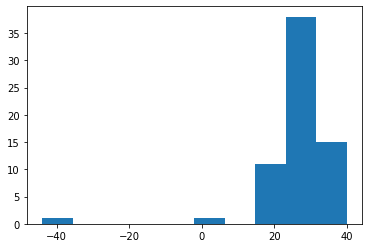

In [ ]:
plt.hist(data_speed)
plt.show()

In [ ]:
n = len(data_speed)
nboot = 100
theta_star_smooth = []
h = 1
fun = np.median
for k in range(nboot):
  eps = np.random.normal(size = nboot, scale= 1/mt.sqrt(n))
  itersample = np.random.choice(data_speed, size=nboot, replace=True)
  xb = itersample + h*eps
  theta_star_smooth.append(fun(xb))

(array([ 3.,  2.,  4., 32.,  5.,  9., 41.,  2.,  1.,  1.]),
 array([26.02673299, 26.32815712, 26.62958126, 26.9310054 , 27.23242954,
        27.53385367, 27.83527781, 28.13670195, 28.43812608, 28.73955022,
        29.04097436]),
 <a list of 10 Patch objects>)

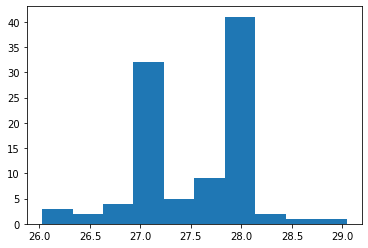

In [ ]:
plt.hist(theta_star_smooth)

(array([16.,  0.,  5.,  0., 40.,  0.,  4.,  0., 34.,  1.]),
 array([26.  , 26.25, 26.5 , 26.75, 27.  , 27.25, 27.5 , 27.75, 28.  ,
        28.25, 28.5 ]),
 <a list of 10 Patch objects>)

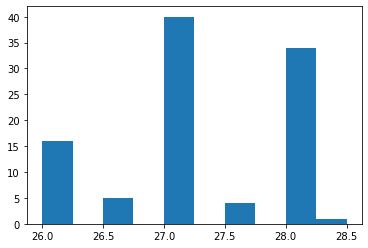

In [ ]:
theta_star_efron = bootstrap(data_speed,func=np.median)
plt.hist(theta_star_efron)

Les histogrammes de la distribution bootstrap et de la distribution bootstrap lisse apparaissent ci-dessous. La distribution bootstrap de la médiane de l'échantillon n'a qu'un petit nombre de valeurs. La distribution bootstrap lissée a un support plus riche.

In [ ]:
cintervals_bootstrap_efron = [ci(p,theta_star_efron) for p in (.90, .95, .99, .995)]
cintervals_bootstrap_smooth =[ci(p,theta_star_smooth) for p in (.90, .95, .99, .995)]
print("Intervalle de confiance de bootstrap Efron", cintervals_bootstrap_efron)
print("Intervalle de confiance de bootstrap smooth", cintervals_bootstrap_smooth)

Intervalle de confiance de bootstrap Efron [(26.0, 28.0), (26.0, 28.0), (26.0, 28.5), (26.0, 28.5)]
Intervalle de confiance de bootstrap smooth [(26.811, 28.108), (26.177, 28.179), (26.027, 29.041), (26.027, 29.041)]


Encore une fois il est difficile de conclure sur cet exemple, mais il semblerait que le bootstrap smooth est meilleur.

L'intérêt de lisser est donc de changer le support, c'est donc très utile également lorsqu'on veut cacher les données de l'échantillon de base, donc par exemple lorsqu'on manipule des données confidentielles.

#VI. Le Bootstrap de Poisson

La méthode du bootstrap par loi de Poisson est une méthode permettant d'exécuter le bootstrap pour des données de taille n très grand.

La bootstrap Efron crée de nouveaux echantillons par tirage aléatoire avec remise. Dans chaque nouvel échantillon donné, chaque observation peut se produire 0, 1 ou plusieurs fois selon $Binomial\left(n, \frac{1}{n}\right)$. Et comme le nombre total d'observations est limité à n, les comptes sont conjointement $Multinomial\left(n, \frac{1}{n}, \cdots, \frac{1}{n}\right)$.

Ainsi avec l'observation $[A,B,C,D]$, on peut par exemple construire deux nouveaux echantillons :


*   $[A, A, C, D]$
*   $[B, C,C,A]$

Nous pouvons en fait décrire tout échantillon bootstrap par le nombre d'occurrences de chaque observation. Pour les rééchantillons ci-dessus, ce serait:


*   $[2, 0, 1, 1]$
*   $[1, 1, 2, 0]$




Le bootstrap d'Efron pose des problèmes de calcul. Pour le calcul parallèle, nous devons prendre des décisions indépendantes quant au nombre de fois où nous devons inclure chaque observation. De plus on pourrait supposer que nos observations $X$  très volumineuses pourraient être réparties sur plusieurs machines différentes. Ainsi, dans le rééchantillon 0, nous voudrions calculer chacun des comptes {0,1,1,2} indépendamment. Mais la somme des comptes dans la distribution multinomiale est fixe. 

Ainsi dans cette situation de données tres volumineuses (n très grand), pour calculer l'occurence d'une observation dans l'échantillon i nous pouvons utiliser le fait que 

$\lim _{n \rightarrow \infty} \operatorname{Binomial}\left(n, \frac{1}{n}\right)=Poisson(1)$. 

Chaque occurence, dans un nouvel échantillon suit donc la loi $P(1)$.

De plus on utilise que pour $n$ tres grand, la loi $P(1)$ étant d'espérance 1, le nombre d'occurences total pour l'echantillon i est environ $n$. ($LGN$)

## Application 

On génère $n$ observations.

On applique l'algorithme du bootstrap Poisson.

In [ ]:
%%time
n= 10000
B= 500
pop = np.random.normal(size =n )

CPU times: user 870 µs, sys: 0 ns, total: 870 µs
Wall time: 1.41 ms


In [ ]:
# Poisson Bootstrap 
%%time
theta_star = []
for k in range(B):  
  indice = np.random.poisson(size=(n)) 
  theta_star_k = sum(indice*pop)/n
  theta_star.append(theta_star_k)

CPU times: user 1.19 s, sys: 1.57 ms, total: 1.19 s
Wall time: 1.21 s


(array([ 11.,  29.,  43.,  80., 112., 116.,  50.,  37.,  17.,   5.]),
 array([-0.03132288, -0.0260203 , -0.02071771, -0.01541513, -0.01011254,
        -0.00480995,  0.00049263,  0.00579522,  0.0110978 ,  0.01640039,
         0.02170298]),
 <a list of 10 Patch objects>)

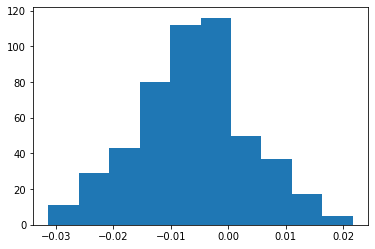

In [ ]:
plt.hist(theta_star)

In [ ]:
# Efron bootstrap
%%time
theta_star = []
for k in range(B):  # generate a bootstrap sample a each time n
  itersample = np.random.choice(pop, size=n, replace=True)
  theta_star_i = itersample.mean()
  theta_star.append(theta_star_i)

CPU times: user 113 ms, sys: 819 µs, total: 113 ms
Wall time: 117 ms


(array([  7.,  26.,  79., 115., 127.,  90.,  40.,  12.,   2.,   2.]),
 array([-3.34581115e-02, -2.67845716e-02, -2.01110317e-02, -1.34374919e-02,
        -6.76395196e-03, -9.04120670e-05,  6.58312783e-03,  1.32566677e-02,
         1.99302076e-02,  2.66037475e-02,  3.32772874e-02]),
 <a list of 10 Patch objects>)

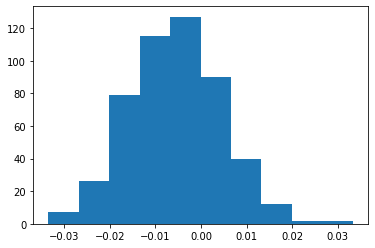

In [ ]:
plt.hist(theta_star)

Nous remarquons que le Poisson bootstrap n'est ici pas plus rapide que le bootstrap Efron. Cependant on comprend qu'il peut être une solution viable pour des données très volumineuses réparties sur plusieurs machines.

# Conclusion

Nous avons donc vu plusieurs manières de rééchantillonner un jeu de données pour calculer des estimateurs. Chaque méthode a ses avantages, et dans des cas plus ou moins précis, elles peuvent mieux performer que le bootstrap selon la méthode proposée par Efron.

Malgré cela, on peut retenir que le bootstrap est une méthode puissante pour estimer avec confiance, et se réalise très bien avec un rééchantillonage aléatoire avec remise.